In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6090 - Analytics Consulting Project\webscrape\communitech\companies.csv")

data = data.drop(columns=['Stage', 'Head Count','Description','Locations','Logo URL','Active Jobs Count'])

# Ensure that 'Topics' and 'Industry Tags' columns are strings
data['Topics'] = data['Topics'].astype(str)
data['Industry Tags'] = data['Industry Tags'].astype(str)

# Split the 'Topics' and 'Industry Tags' columns
data['Topics'] = data['Topics'].apply(lambda x: x.split(','))
data['Industry Tags'] = data['Industry Tags'].apply(lambda x: x.split(','))

# Use TransactionEncoder to one-hot encode the lists in 'Topics' and 'Industry Tags'
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(data['Topics'] + data['Industry Tags'])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

# Combine the encoded data with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Drop the original 'Topics' and 'Industry Tags' columns
data.drop(['Topics', 'Industry Tags'], axis=1, inplace=True)

# Identify columns with non-numeric values
non_numeric_columns = data.select_dtypes(exclude='number').columns.tolist()

# Convert columns to integer type (excluding non-numeric columns)
numeric_columns = [col for col in data.columns if col not in non_numeric_columns]
data[numeric_columns] = data[numeric_columns].astype(int)

data.head()

,Name,1-9,10-49,50-99,500 global,AI/ML,Advertising/marketing,Aerospace,Agnostic (all),Agriculture,...,Semiconductors,Sensors/IoT,Software,Sports,Sustainability,Transportation,Travel,Wealth management,Wellness and Beauty,nan
0,Cohere,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Shinydocs,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Mappedin,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fable,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Dozr,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

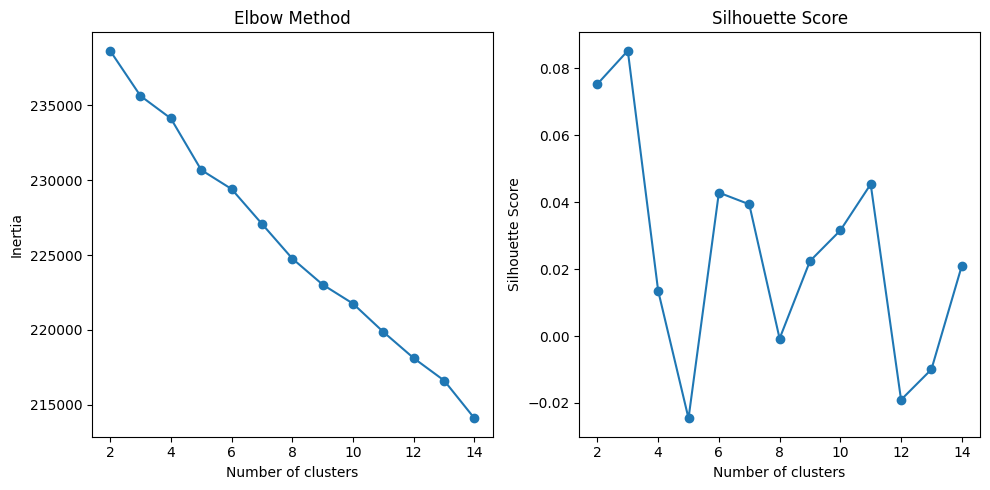

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data (assuming it's already prepared as you've shown)
# data = pd.read_csv('your_data.csv')

# Remove the 'Name' column as it's non-numeric and not needed for clustering
data = data.set_index('Name')

# Standardize the numeric data (Z-score normalization)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(data)

# Initialize lists to store inertia (within-cluster sum of squares) and silhouette scores
inertia = []
silhouette_avg = []

# Define the range of cluster numbers you want to test
cluster_range = range(2, 15)

# Loop through different numbers of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(numeric_data_scaled)  # Fit KMeans on the standardized numeric data
    inertia.append(kmeans.inertia_)  # Store the inertia value
    labels = kmeans.labels_
    
    if num_clusters > 1:
        silhouette_avg.append(silhouette_score(numeric_data_scaled, labels))  # Calculate silhouette score

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot the silhouette score graph
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_avg, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=11, random_state=0)

# Fit KMeans to your data
kmeans.fit(data)  # Make sure 'data' contains your numeric features

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original DataFrame (if needed)
data['Cluster_Labels'] = cluster_labels

# You can access the cluster centers using kmeans.cluster_centers_

# You can also access the cluster assignments for your data points with cluster_labels

c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


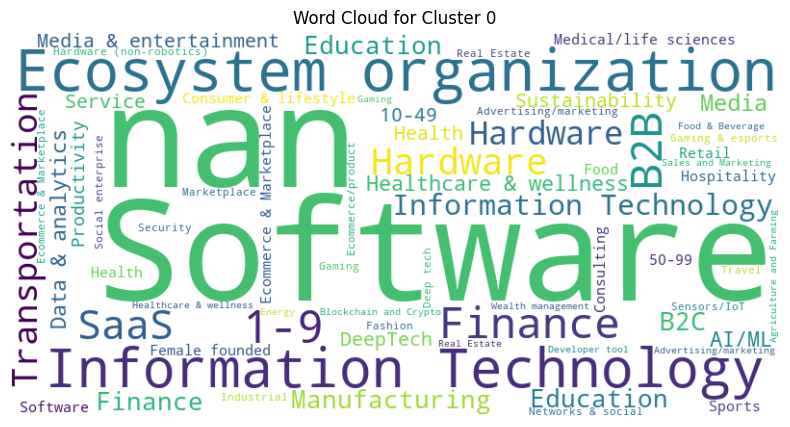

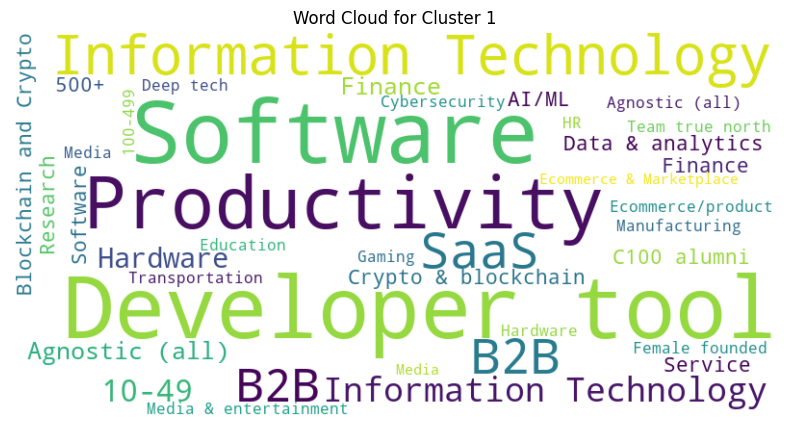

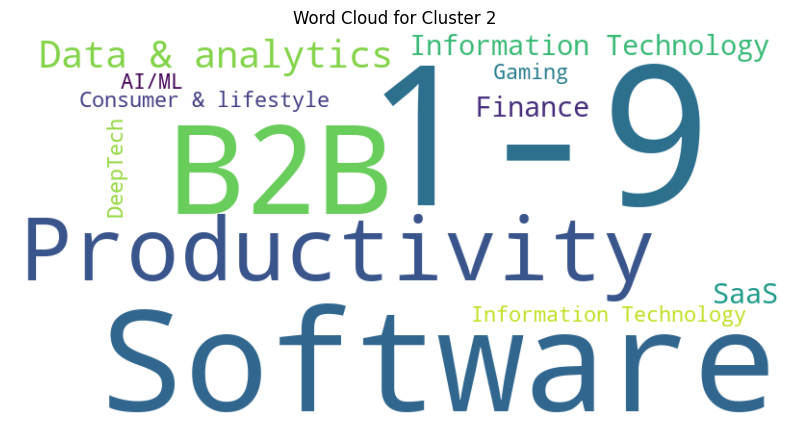

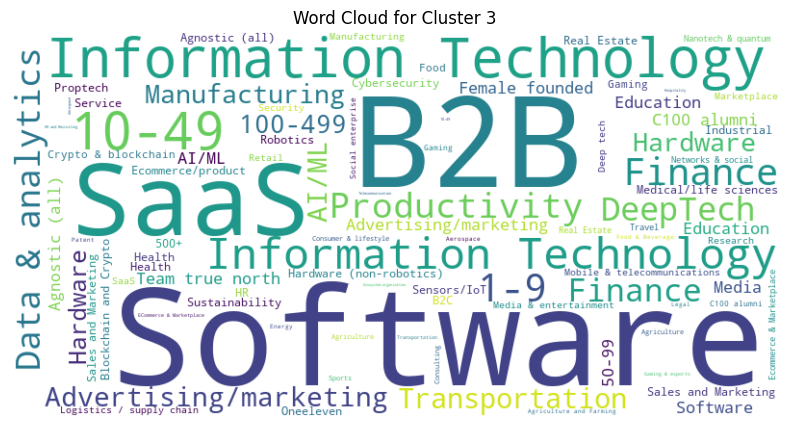

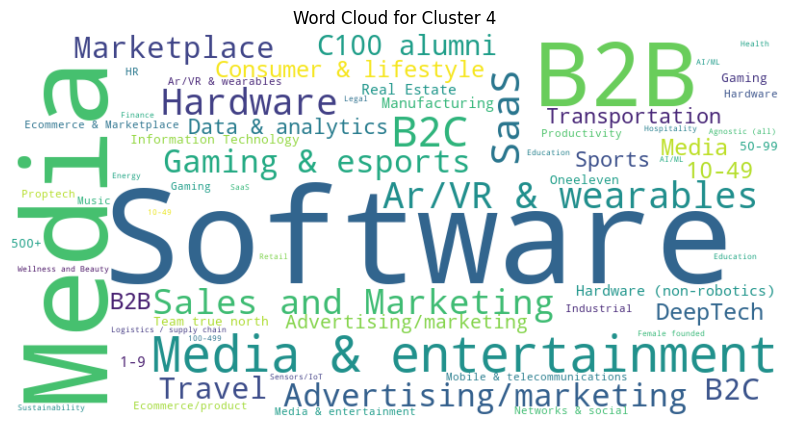

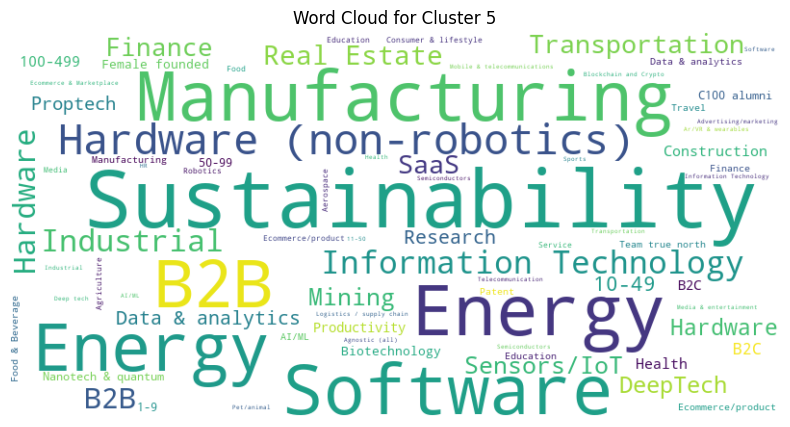

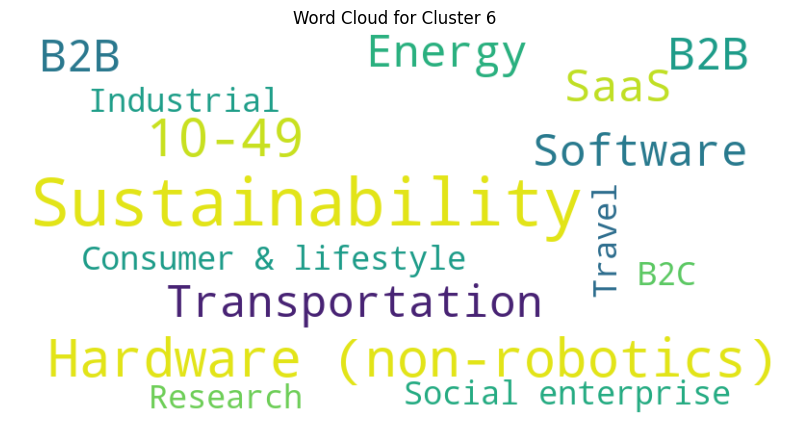

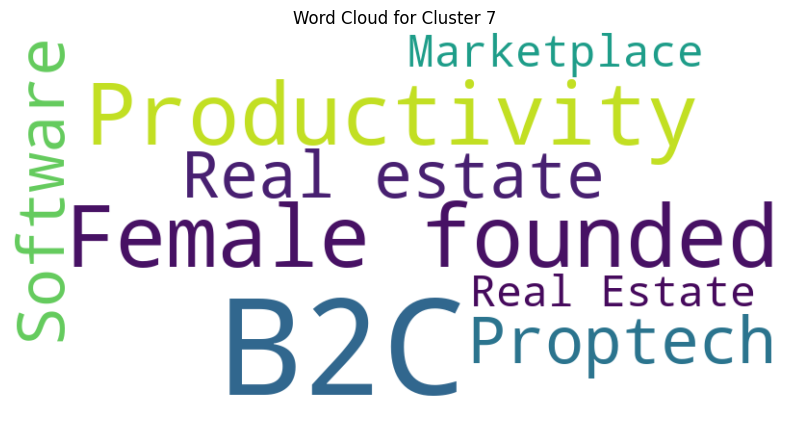

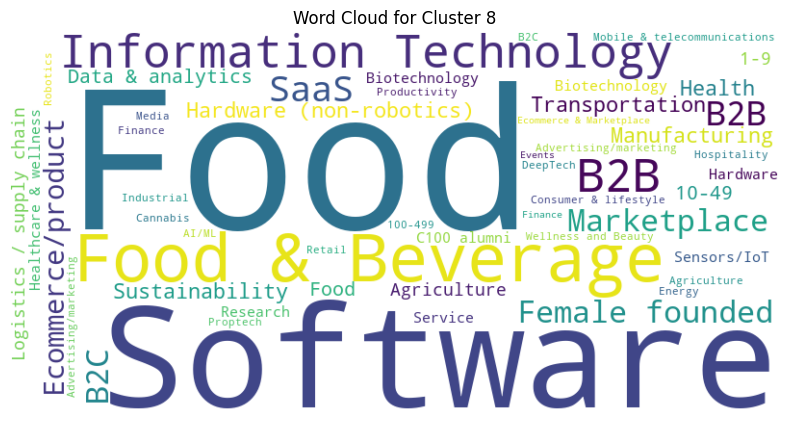

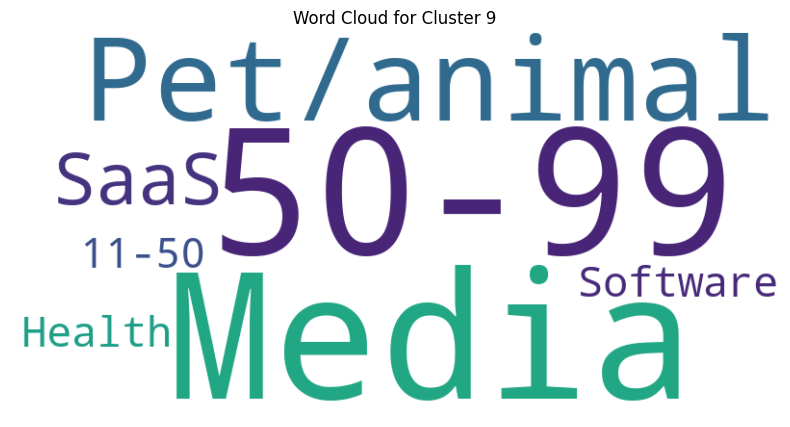

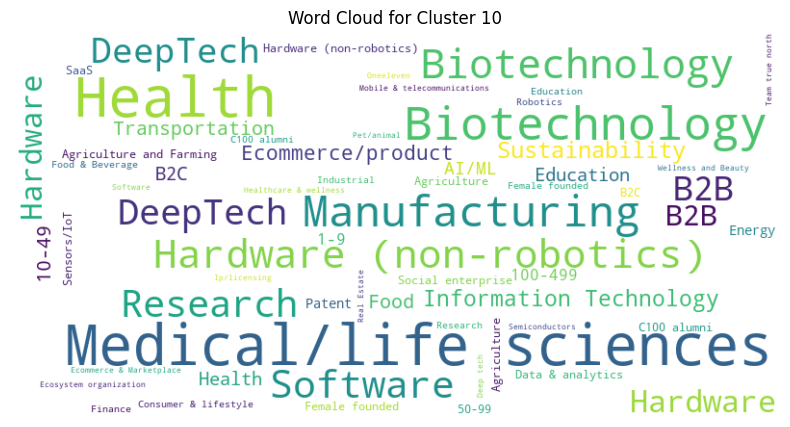

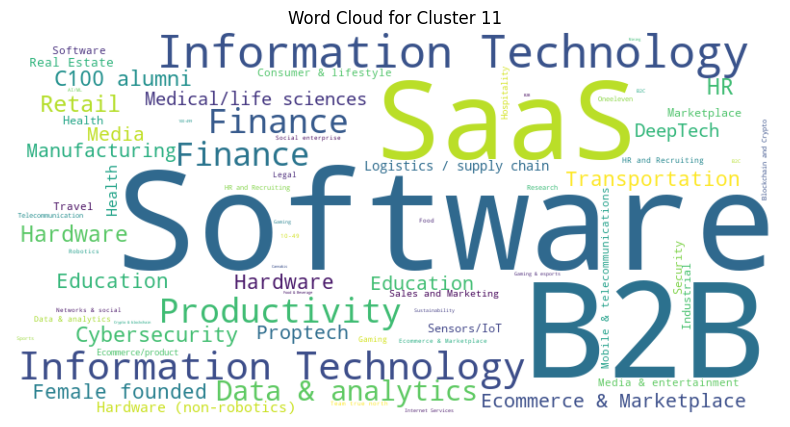

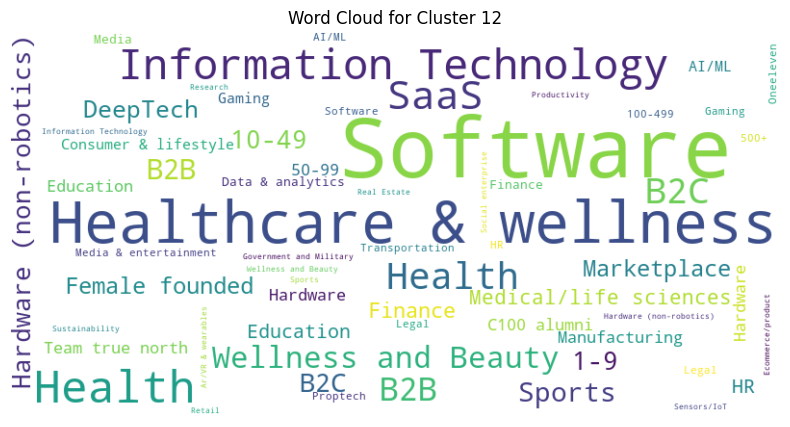

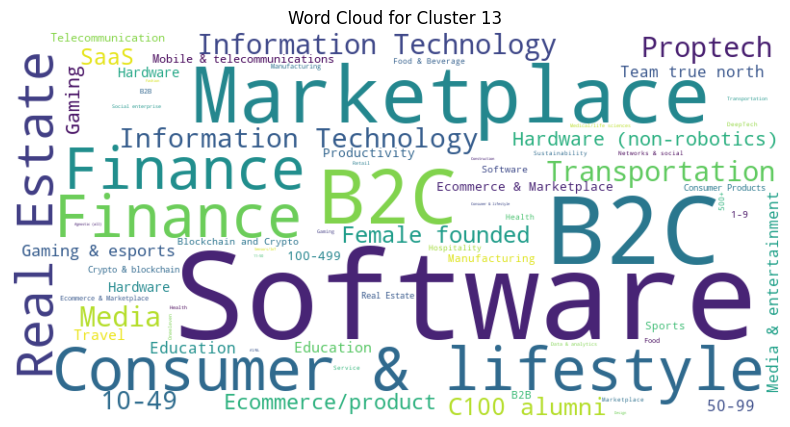

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your data (assuming it's already prepared as you've shown)
# data = pd.read_csv('your_data.csv')

# Standardize the numeric data (Z-score normalization)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(data)

# Perform KMeans clustering with 11 clusters
kmeans = KMeans(n_clusters=14, random_state=0)
kmeans.fit(numeric_data_scaled)

# Add a 'Cluster' column to your DataFrame
data['Cluster'] = kmeans.labels_

# Group data by cluster and concatenate words (column names)
cluster_wordcloud_data = data.groupby('Cluster').sum()

# Generate word clouds for each cluster
for cluster_label, cluster_data in cluster_wordcloud_data.iterrows():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cluster_data.drop('Cluster_Labels'))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster_label}')
    plt.axis('off')
    plt.show()


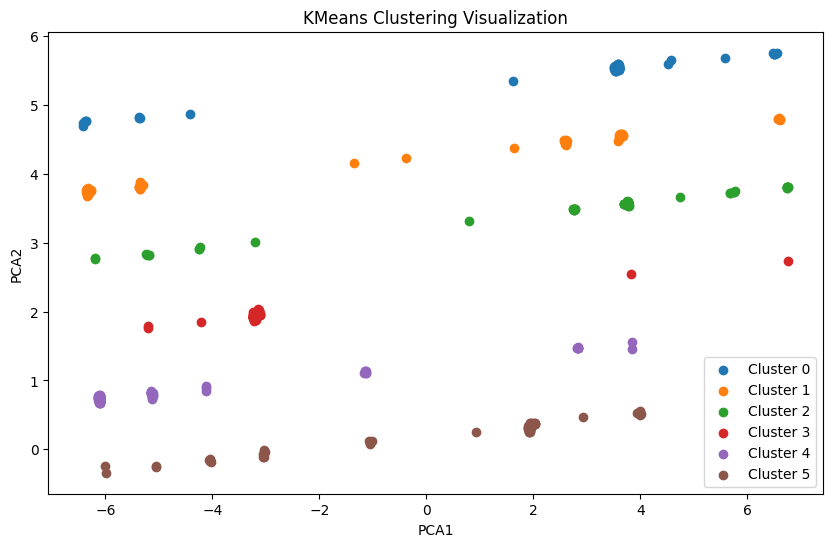

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Add the cluster labels to the reduced data
reduced_data_with_labels = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
reduced_data_with_labels['Cluster_Labels'] = cluster_labels

# Create a scatter plot of the reduced data with color-coded clusters
plt.figure(figsize=(10, 6))
for cluster in range(6):  # Adjust the range based on the number of clusters
    plt.scatter(
        reduced_data_with_labels[reduced_data_with_labels['Cluster_Labels'] == cluster]['PCA1'],
        reduced_data_with_labels[reduced_data_with_labels['Cluster_Labels'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('KMeans Clustering Visualization')
plt.show()


In [7]:
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

# Now, all columns should be numeric
print("Remaining non-numeric columns:", data.select_dtypes(exclude=['number']).columns.tolist())

KeyError: "['Name'] not in index"

In [ ]:
data.head()

,1-9,10-49,50-99,500 global,AI/ML,Advertising/marketing,Aerospace,Agnostic (all),Agriculture,Ar/VR & wearables,...,Sensors/IoT,Software,Sports,Sustainability,Transportation,Travel,Wealth management,Wellness and Beauty,nan,Cluster_Labels
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8
